<a href="https://colab.research.google.com/github/marioskyriacou/image_text_clf/blob/main/Image_Text_Classification_Sentiment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
# Mount Drive
from google.colab import drive
# Main libraries
import pandas as pd
import numpy as np
import os
# plots
import seaborn as sns
import matplotlib.pyplot as plt
# text analysis
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
# Stemiming

from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
### Text Featur Extraction
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
### Images
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image
# HOG feature extraction
from skimage.feature import hog
from skimage import exposure
#LBP feat extraction
from skimage.feature import local_binary_pattern

#time
import time
from tqdm import tqdm

import multiprocessing
from sklearn.utils import shuffle

# Split data
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

# Balance Data
from imblearn.over_sampling import SMOTE


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


# Remove 25% of the data



```
# read csv directory
text_df = pd.read_csv(label_directory)
```



Delete 25% from each sentiment



```
def remove_25_per(df, col, percentage):
  # Remove a given % of each category in a categorical column
  unique_classes = df[col].unique()
  indx_remove_lst = []

  for class_label in unique_classes:
    # Get indices of samples belonging to the current class
    class_indices = df[df[col] == class_label].index

    # Calculate 25% of samples to remove
    num_samples_to_remove = int(percentage * len(class_indices))
    print(f'Class_Name:{class_label}, Amount:{len(class_indices)}, To_remove:{num_samples_to_remove}')

    # Randomly select indices to remove
    indices_to_remove = np.random.choice(class_indices, num_samples_to_remove, replace=False)
    indx_remove_lst.append(indices_to_remove)

  #Flatten lists of lists
  indx_remove_lst = [item for sublist in indx_remove_lst for item in sublist]
  image_names_remove = df['image_name'].iloc[indx_remove_lst].to_list()
  print(f'Total Samples removes:{len(indx_remove_lst)}')
  return indx_remove_lst, image_names_remove
```





```
indx_remove_lst, image_names_remove = remove_25_per(df= text_df, col ='overall_sentiment', percentage=0.35)
```





```
print(f'Text Data Shape Before {text_df.shape}')
text_df = text_df.drop(indx_remove_lst)
print(f'Text Data Shape After {text_df.shape}')
```





```
# Loop through each image filename
for image_filename in image_names_remove:
    # Full path to the image
    image_path = os.path.join(image_directory, image_filename)
    # Check if the file exists
    if os.path.exists(image_path):
        # Remove the file
        os.remove(image_path)
        #print(f"{image_filename} has been removed from {image_directory}.")
    else:
        print(f"{image_filename} does not exist in {image_directory}.")

text_df.to_csv('/content/drive/MyDrive/Image_Text_Classification/Dataset/labels_update.csv', index=False)
```



**Class_Name**:very_positive, **Amount**:1033, **To_remove**:361\
**Class_Name**:positive, **Amount**:3127, **To_remove**:1094\
**Class_Name**:neutral, **Amount**:2201, **To_remove**:770\
**Class_Name**:negative, **Amount**:480, **To_remove**:168\
**Class_Name**:very_negative, **Amount**:151, **To_remove**:52\
Total Samples removes:2445\
Text Data Shape Before (6992, 5)\
Text Data Shape After (4547, 5)

# Papers

*Multi-Modal Classification Using Images and Text:*
* [Paper 1](https://scholar.smu.edu/cgi/viewcontent.cgi?article=1165&context=datasciencereview)

*Text:*
* [Paper 1](https://www.researchgate.net/profile/Vijayarani-Mohan/publication/339529230_Preprocessing_Techniques_for_Text_Mining_-_An_Overview/links/5e57a0f7299bf1bdb83e7505/Preprocessing-Techniques-for-Text-Mining-An-Overview.pdf)
* [Paper 2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5732309/#:~:text=Selection%20from%20the%20document%20part,%2C%20mapping%2C%20and%20clustering%20method )

**Word2Vec** \
[Word2Vec prt1](https://spotintelligence.com/2023/02/15/word2vec-for-text-classification/#Word2Vec_for_text_classification)    // [Word2Vec prt2](https://udai.gitbook.io/practical-ml/natural-language-processing/basics-of-nlp-and-feature-extraction-methods/feature-extraction-methods-word2vec) // [Word2Vec prt3](https://www.analyticsvidhya.com/blog/2023/07/step-by-step-guide-to-word2vec-with-gensim/) // [Word2Vec prt4](https://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac) // [Word2Vec prt5](https://medium.com/analytics-vidhya/implementing-word2vec-in-tensorflow-44f93cf2665f)

**Weighted TF-IDF**

[TF-IDF prt1](https://medium.com/geekculture/text-feature-extraction-2-3-tf-idf-model-c3a8f7a92bc9) // [TF-IDF prt2](https://www.geeksforgeeks.org/sklearn-feature-extraction-with-tf-idf/) // [TF-IDF prt3](https://ayselaydin.medium.com/5-tf-idf-a-traditional-approach-to-feature-extraction-in-nlp-using-python-348873750e1e) // [Imbalance Tf-IDF1]( https://medium.com/@rohit_batra/multi-class-text-classification-with-scikit-learn-using-tf-idf-model-161d395ce374) // [Imbalance Tf-IDF2](http://michael-harmon.com/blog/NLP1.html) // [Imbalance Tf-IDF 3](https://www.deepwizai.com/projects/how-to-correctly-use-tf-idf-with-imbalanced-data )



[Image Feature Extraction techniques](https://medium.com/@mohitjavali/10-ways-to-extract-features-from-an-image-f44c8e9b0fbf)


**Histogram of Oriented Gradients (HOG)**\
[HOG 1](https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/) // [HOG 2](https://towardsdatascience.com/hog-histogram-of-oriented-gradients-67ecd887675f) \


**Local Binary Patterns (LBP)**\
[LBP1](https://pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/) // [LBP2](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_local_binary_pattern.html) // [LBP3](https://medium.com/swlh/local-binary-pattern-algorithm-the-math-behind-it-%EF%B8%8F-edf7b0e1c8b3)


**Frequency-based features**\
[FBF1](https://towardsdatascience.com/learn-discrete-fourier-transform-dft-9f7a2df4bfe9) // [FBF2](https://towardsdatascience.com/image-processing-with-python-application-of-fourier-transformation-5a8584dc175b)

# Read Data sets

Mount Drive

In [ ]:
# Connect & Load from grive
drive.mount('/content/drive')
#Check the files in the direcotory
!ls "/content/drive/MyDrive/Image_Text_Classification/Dataset/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
images	labels_update.csv


In [ ]:
#Check the files in the direcotory
label_directory =  "/content/drive/MyDrive/Image_Text_Classification/Dataset/labels_update.csv"
image_directory = "/content/drive/MyDrive/Image_Text_Classification/Dataset/images/images"

## Read csv/text Data

In [ ]:
# read text_df
text_df = pd.read_csv(label_directory)

# delete unnesecary columns
drop_cols = ['Unnamed: 0', 'text_ocr']
text_df = text_df.drop(drop_cols, axis=1)
print(f'Columns Droped:{drop_cols}')
print(f'Text_Data Shape:{text_df.shape}')

#path of images_names
img_lst_names=os.listdir(image_directory)
print(f'Images:{len(img_lst_names)}')


Columns Droped:['Unnamed: 0', 'text_ocr']
Text_Data Shape:(4547, 3)
Images:4544


Null Values Remove & Delete the coresponting Img export Csv without null Vals\
***Null Values(Img):*** image_120.jpg // image_6782.jpg// image_6787.jpg

In [ ]:
# # Null Values index df & images
null_indx = text_df[text_df.isnull().any(axis=1)].index
null_img_indx = text_df['image_name'].iloc[null_indx]
print(f'Null Vals indx:{null_indx}. Null Img:\n{null_img_indx}')
#Drop Null Val df
text_df = text_df.dropna().reset_index(drop=True)

# #Drop Null Val img
# # for image_filename in null_img_indx:
# #   null_image_path = os.path.join(image_directory, image_filename)
# #   os.remove(null_image_path)

print(f'Data Shape:{text_df.shape}')
print(text_df.shape[0] == len(img_lst_names) )

Null Vals indx:Index([80, 4412, 4415], dtype='int64'). Null Img:
80       image_120.jpg
4412    image_6782.jpg
4415    image_6787.jpg
Name: image_name, dtype: object
Data Shape:(4544, 3)
True


## Read .png/image data

In [ ]:
def load_images(folder_path, image_ids, width, height):
  # Read and store image
  # the images are resized, gray scaled and normalized
  img_data = []
  for id in tqdm(image_ids):
    image_path = os.path.join(folder_path, id) # image path
    img = image.load_img(image_path, target_size = (width, height, 3) ) #load the image
    img_array = np.array(img) #convert to array
    img_grayscaled = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY) # grayscale
    img_norm = np.array(img_grayscaled) / 255
    img_data.append(img_norm) #normalize

  return img_data

In [ ]:
images = load_images(folder_path = image_directory,
            image_ids = img_lst_names,
            width =200, height=200)

 11%|█▏        | 514/4544 [02:12<01:33, 43.03it/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 4544/4544 [03:47<00:00, 19.96it/s]


## Analysis of the data

In [ ]:
def plot_target(df, col, title):
  ax = sns.countplot(x=df[col],
                    order=df[col].value_counts(ascending=False).index);

  abs_values = df[col].value_counts(ascending=False)
  rel_values = df[col].value_counts(ascending=False, normalize=True).values * 100
  lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

  ax.bar_label(container=ax.containers[0], labels=lbls)

  plt.title(title)
  plt.grid()
  ax.set_axisbelow(True)  # grid lines are behind the rest
  plt.show()

In [ ]:
def remapping(x):
  if x == 'very_positive':
    return 'positive'
  elif x == 'very_negative':
    return 'negative'
  else:
    return x

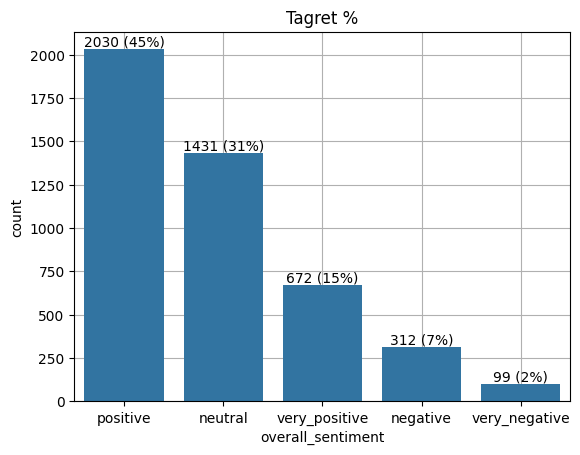

In [ ]:
plot_target(df = text_df, col = 'overall_sentiment', title = 'Tagret %')

In [ ]:
#remapping the sentiment
text_df['overall_sentiment'] = text_df['overall_sentiment'].apply(remapping)

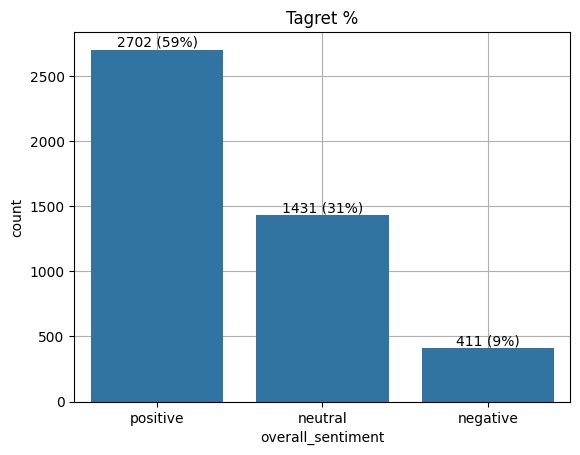

In [ ]:
plot_target(df = text_df, col = 'overall_sentiment', title = 'Tagret %')

Data Encoding

In [ ]:
text_df_lbl_mapping = {"positive": 0, 'neutral':1, 'negative':2}
text_df['overall_sentiment'] = text_df['overall_sentiment'].map(text_df_lbl_mapping)

# Text Analysis - Functions

## Functions - Text preprocessing

*Lower Case*

In [ ]:
def lower_case_sentiment(text):
  return text.lower()

*Remove urls*

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

# count urls
def count_url(df, col):
  url_count = 0
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
      # Find all matches of URLs in the text
  for i in df[col]:
    urls = re.findall(url_pattern, i)
    if len(urls) != 0:
      url_count = url_count + 1
  print(f'Urls: {url_count}')

In [ ]:
def remove_punctuations(text):
    # Create translation table
    translator = str.maketrans('', '', string.punctuation)
    # Remove punctuations
    return text.translate(translator)

*Remove Punctuations*

In [ ]:
def remove_punctuations(text):
    # Create translation table
    translator = str.maketrans('', '', string.punctuation)
    # Remove punctuations
    return text.translate(translator)

*Remove Stop words*

In [ ]:
def remove_stopwords(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Get English stopwords from NLTK
    stop_words = set(stopwords.words('english'))
    # Remove stopwords from the text
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

*Remove Numbers*

In [ ]:
def remove_numbers(text):
    # Use regular expression to remove numbers
    return re.sub(r'\d+', '', text)

*Remove Non-English Words*

In [ ]:
def remove_non_english_words(text):
    words = nltk.word_tokenize(text)
    #English words from NLTK
    english_words = set(nltk.corpus.words.words())
    #set of English words
    english_text = ' '.join([word for word in words if word in english_words])
    return english_text

***Stemming vs Lemmatizations:***
* [Link 1](https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/#:~:text=While%20stemming%20involves%20chopping%20off,computationally%20more%20expensive%20than%20stemming.)
* [Link 2](https://www.ibm.com/topics/stemming-lemmatization#:~:text=The%20practical%20distinction%20between%20stemming,be%20found%20in%20the%20dictionary.)

In [ ]:
# Snowball Stemmer - english
snowball = SnowballStemmer(language='english')

def snowball_stem(text):
    words = word_tokenize(text)
    #Snowball Stemmer to each word
    stemmed_words = [snowball.stem(word) for word in words]
    # Join the stemmed
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

## Text Feature Extraction (Functions)

Word 2 Vector

In [ ]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
sentences = [sentence.split() for sentence in text_df['text_corrected'].to_list()]

w2v_train = Word2Vec(sentences=sentences,
                     vector_size=3000, ##output size of word emebedding
                     window=2, ##window size
                     min_count=5, ## ignors all the words with total frquency lower than this
                     workers=cores-1) ##number of workers to use


In [ ]:
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_train.wv[word] for word in words if word in w2v_train.wv]
    if len(words_vecs) == 0:
        return np.zeros(3000) # the zeros must be tha same size as the vector_size
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)





```
X_w2v = np.array([vectorize(sentence) for sentence in X])
X_w2v.shape

# Normalize
df_w2v = pd.DataFrame(X_w2v)
df_w2v = (df_w2v-df_w2v.min())/(df_w2v.max()-df_w2v.min())
df_w2v.shape
```



Weighted TF-IDF

In [ ]:
def compute_class_weight(train_y):
    """
    Compute class weight given imbalanced training data
    Usually used in the neural network model to augment the loss function (weighted loss function)
    Favouring/giving more weights to the rare classes.
    """
    import sklearn.utils.class_weight as scikit_class_weight

    class_list = list(set(train_y))
    class_weight_value = scikit_class_weight.compute_class_weight(class_weight ='balanced', classes = class_list, y = train_y)
    class_weight = dict()

    # Initialize all classes in the dictionary with weight 1
    curr_max = int(np.max(class_list))
    for i in range(curr_max):
        class_weight[i] = 1

    # Build the dictionary using the weight obtained the scikit function
    for i in range(len(class_list)):
        class_weight[class_list[i]] = class_weight_value[i]

    return class_weight

In [ ]:
def tfidf_helper(data, target, unique_class):
  return data[data[target] == unique_class]['text_corrected'].to_list()

def tfidf_imbalance(data, target, max_feat, weights =None):
  classes = data[target].unique()

  # Class weights
  if weights is None:
    samples_per_class = [ len(data[data[target] == clas])  for clas in classes]
    total_samples = len(data)
    weights = [round(class_samples/total_samples, 2) for class_samples in samples_per_class ]
  # Class features
  max_features = [int(max_feat * weight) for weight in weights ]
  print(f'Weights per class {weights}')
  print(f'Features per class {max_features}')

  # create vocabulary out of the weights for each class uisng tf-idf
  dfs, vocabularies,  = [], []
  for cls, max_feature in zip(classes, max_features):
    df_class = tfidf_helper(data, target, cls)
    #impliment TF-IDf in each dataset
    tfidf_class = TfidfVectorizer(max_features=max_feature)
    tfidf_class.fit_transform(df_class)
    # Append keys - words
    vocabularies.append(tfidf_class.get_feature_names_out() )

  vocabulary = set([word for vocab in vocabularies for word in vocab])
  print(f'Vocabulary len:{len(vocabulary)}')

  # Weighted TF-IDF
  tfidf_weight = TfidfVectorizer(vocabulary = vocabulary)
  df_tfidf = pd.DataFrame(tfidf_weight.fit_transform(data['text_corrected']).toarray(), columns = tfidf_weight.get_feature_names_out() )
  print(f'Data Shape:{df_tfidf.shape}')
  return df_tfidf




```
weights = [ w for w in compute_class_weight(y).values()]
df_tdidf = tfidf_imbalance(text_df, 'overall_sentiment', 500, weights = weights)
df_tdidf = (df_tdidf-df_tdidf.min())/(df_tdidf.max()-df_tdidf.min())
```



# Image Analysis - Functions

Image Feature Extraction

HOG

In [ ]:
def hog_feature_extr(images):
  hog_feat = []
  for img in tqdm(images):
    fd, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2,2), visualize=True, block_norm='L2-Hys')
    hog_feat.append(fd)
  return np.array(hog_feat)

In [ ]:
def display_hog_img(hog_image):
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 100))
  plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
  plt.title('Histogram of Oriented Gradients (HOG)')
  plt.show()

LBP

In [ ]:
def compute_lbp(images, radius = 3, METHOD = 'uniform'):
  n_points = 3*radius
  lbp =[]

  for img in tqdm(images):
    lbp_img = local_binary_pattern(img, n_points, radius, METHOD)# lbp
    n_bins = int(lbp_img.max() + 1)# bins
    hist, _ = np.histogram(lbp_img.ravel(), bins=n_bins, range=(0, n_bins))
    #normalize
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    lbp.append(hist)

  return np.array(lbp)




```
# lbp_train = compute_lbp(train_img)
# lbp_train = np.array(lbp_train)
# lbp_val = compute_lbp(val_img)
# lbp_val = np.array(lbp_val)
# lbp_train.shape, y_train.shape, lbp_val.shape, y_test.shape
```



DFT- Frequency-based feature

In [ ]:
def extract_dft_features(image):
  epsilon = 1e-10
  dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT) # (DFT)
  dft_shift = np.fft.fftshift(dft) #zero frequency component to the center
  # magnitude spectrum
  magnitude = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
  magnitude_without0 = np.array([arr + (arr == 0) * epsilon for arr in magnitude]) # add an epsilon to 0 magnitute features / log(0) -> -inf
  magnitude_spectrum = 20 * np.log(magnitude_without0)

  features = magnitude_spectrum.flatten() # Extract features
  return features


In [ ]:
def dft_main(images):
  # perform discrete fourier transformation
  dft_features =[]
  for img in tqdm(images):
    features = extract_dft_features(img)
    dft_features.append(features)

  # normilize features
  features = np.array(dft_features)
  def norm(sample):
    return (sample - sample.min()) / (sample.max() - sample.min())
  feat_norm = np.array([norm(feat) for feat in features ])

  return  feat_norm



```
# dft_train = dft_main(train_img)
# dft_val = dft_main(val_img)
```



# ML Procedure

In [ ]:
#Generalizing a model with our test data for making prediction
def report(model, X_test, y_test):
  y_pred=model.predict(X_test)

  print(classification_report(y_test,y_pred))
  cm = confusion_matrix(y_test, y_pred)
  print(cm)

  print('Acc:', round(accuracy_score(y_test, y_pred) ,4))
  print('Ballance Accy:', round(balanced_accuracy_score(y_test, y_pred) ,4))
  print('Pr:', round(precision_score(y_test, y_pred,average='weighted') ,4))
  print('Rec:', round(recall_score(y_test, y_pred, average='weighted') ,4))
  print('F1:', round(f1_score(y_test, y_pred, average='weighted') ,4))

In [ ]:
def split_data(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

  unique_train, counts_train = np.unique(y_train, return_counts=True)
  unique_test, counts_test = np.unique(y_test, return_counts=True)

  print(f'Train:{len(X_train)}-Test:{len(X_test)}')
  print(f'Train: {unique_train}-{counts_train}')
  print(f'Test: {unique_test}-{counts_test}')
  return X_train, X_test, y_train, y_test

In [ ]:
def oversampling_smote(X, y):
  X_over, y_over = SMOTE().fit_resample(X, y)
  unique, counts = np.unique(y_over, return_counts=True)
  print(unique, counts)
  return X_over, y_over

# Main - Feature Extraction

## Text Pre-Processing

In [ ]:
text_df['text_corrected'] = text_df['text_corrected'].apply(lower_case_sentiment)
print('-- Lower --')
count_url(df=text_df, col='text_corrected')
text_df['text_corrected'] = text_df['text_corrected'].apply(remove_urls)
count_url(df=text_df, col='text_corrected')
print('-- Url Remove --')
text_df['text_corrected'] = text_df['text_corrected'].apply(remove_punctuations)
print('-- Punctuations Remove --')
text_df['text_corrected'] = text_df['text_corrected'].apply(remove_stopwords)
print('-- StopWords Remove --')
text_df['text_corrected'] = text_df['text_corrected'].apply(remove_numbers)
print('-- Numbers Remove --')
text_df['text_corrected'] = text_df['text_corrected'].apply(remove_non_english_words)
print('-- Non-English Remove --')
text_df['text_corrected'] = text_df['text_corrected'].apply(snowball_stem)
print('-- Stemming --')

-- Lower --
Urls: 63
Urls: 0
-- Url Remove --
-- Punctuations Remove --
-- StopWords Remove --
-- Numbers Remove --
-- Non-English Remove --
-- Stemming --


 ## Text Feature exctraction

In [ ]:
X_text = text_df['text_corrected'].to_list()
y = np.array(text_df['overall_sentiment'])

Word2Vec

In [ ]:
X_w2v = np.array([vectorize(sentence) for sentence in X_text])
X_w2v.shape

# Normalize
df_w2v = pd.DataFrame(X_w2v)
df_w2v = (df_w2v-df_w2v.min())/(df_w2v.max()-df_w2v.min())
df_w2v.shape

(4544, 3000)

Weighted Tf-IDF

In [ ]:
# weights = [ w for w in compute_class_weight(y).values()]
# df_tdidf = tfidf_imbalance(text_df, 'overall_sentiment', 500, weights = weights)
# # Normalize
# df_tdidf = (df_tdidf-df_tdidf.min())/(df_tdidf.max()-df_tdidf.min())
# df_tdidf.shape

## Image Feature Extraction

HOG

In [ ]:
# X_hog = hog_feature_extr(images)
# X_hog.shape

LBP

In [ ]:
# X_lbp = compute_lbp(images)
# X_lbp.shape

DFT

In [ ]:
dft_train = dft_main(images)
dft_train.shape

100%|██████████| 4544/4544 [00:28<00:00, 157.26it/s]


(4544, 40000)

# Main - ML Models

In [ ]:
def split_smote_img(text_df, y):
  print(f'Text:{text_df.shape}')
  # text - SMOTE
  X_train_text, X_test_text, y_train_text, y_test_text = split_data(text_df, y)
  X_over_text, y_over_text = oversampling_smote(X_train_text, y_train_text)
  print('... Text SMOTE')
  return X_train_text,y_train_text, X_test_text,  y_test_text

def split_smote_txt(img_df, y):
  print(f'Image:{img_df.shape}')
  # image - SMOTE
  X_train_img, X_test_img, y_train_img, y_test_img = split_data(img_df, y)
  X_over_img, y_over_img = oversampling_smote(X_train_img, y_train_img)
  print('... Img SMOTE')
  return X_train_img, y_train_img, X_test_img, y_test_img

In [ ]:
print(' ...  Text ...')
X_over_text, y_over_text, X_test_text, y_test_text = split_smote_img(X_w2v, y)
print(f'X_train: {X_over_text.shape}, y_train:{y_over_text.shape}\nX_test:{X_test_text.shape} y_test:{y_test_text.shape}')

print(' ...  Image ...')
X_over_img, y_over_img, X_test_img, y_test_img = split_smote_img(dft_train, y)
print(f'X_train: {X_over_img.shape}, y_train:{y_over_img.shape}\nX_test:{X_test_img.shape} y_test:{y_test_img.shape}')

 ...  Text ...
Text:(4544, 3000)
Train:3635-Test:909
Train: [0 1 2]-[2161 1145  329]
Test: [0 1 2]-[541 286  82]
[0 1 2] [2161 2161 2161]
... Text SMOTE
X_train: (3635, 3000), y_train:(3635,)
X_test:(909, 3000) y_test:(909,)
 ...  Image ...
Text:(4544, 40000)
Train:3635-Test:909
Train: [0 1 2]-[2161 1145  329]
Test: [0 1 2]-[541 286  82]
[0 1 2] [2161 2161 2161]
... Text SMOTE
X_train: (3635, 40000), y_train:(3635,)
X_test:(909, 40000) y_test:(909,)


Target Correlation

# Early fusion  

In [ ]:
#X_test_text.index = X_test_text.reset_index(drop=True).index

In [ ]:
main_test = pd.concat((pd.DataFrame(X_test_text), pd.DataFrame(X_test_img)), axis=1)

In [ ]:
# X_over_text.index = X_over_text.reset_index(drop=True).index

In [ ]:
main_train = pd.concat((pd.DataFrame(X_over_text), pd.DataFrame(X_over_img)), axis=1)

In [ ]:
print(f'Train:{main_train.shape} Test:{main_test.shape}')

Train:(3635, 43000) Test:(909, 43000)


In [ ]:
# sgd = SGDClassifier().fit(main_train.values, y_over_text)
# print('..trained')
# report(model = sgd, X_test =main_test, y_test = y_test_text)

..trained
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       541
           1       0.33      0.31      0.32       286
           2       0.12      0.02      0.04        82

    accuracy                           0.51       909
   macro avg       0.35      0.34      0.33       909
weighted avg       0.47      0.51      0.49       909

[[374 156  11]
 [194  88   4]
 [ 56  24   2]]
Acc: 0.5105
Ballance Accy: 0.3411
Pr: 0.4706
Rec: 0.5105
F1: 0.4857


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
from keras.utils import to_categorical
tf.config.run_functions_eagerly(True)

In [ ]:
y = to_categorical(y_over_text)

In [ ]:
model = Sequential()
model.add(Dense(362 ,input_dim=main_train.shape[1], activation='relu')) #8, 10
model.add(Dense(256 , activation='relu')) #8, 10
model.add(Dense(158 , activation='relu')) #8, 10
model.add(Dense(64 , activation='relu')) #8, 10

model.add(Dense(3, activation='sigmoid')) # softmax


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 362)               15566362  
                                                                 
 dense_1 (Dense)             (None, 256)               92928     
                                                                 
 dense_2 (Dense)             (None, 158)               40606     
                                                                 
 dense_3 (Dense)             (None, 64)                10176     
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 15710267 (59.93 MB)
Trainable params: 15710267 (59.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(main_train,
                    y,
                    epochs=5,
                    batch_size=500,
                    validation_split=0.25
                    ) # callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)]

In [ ]:
lsvc = SVC().fit(main_train.values, y_over_text)
print('..trained')
report(model = lsvc, X_test =main_test, y_test = y_test_text)